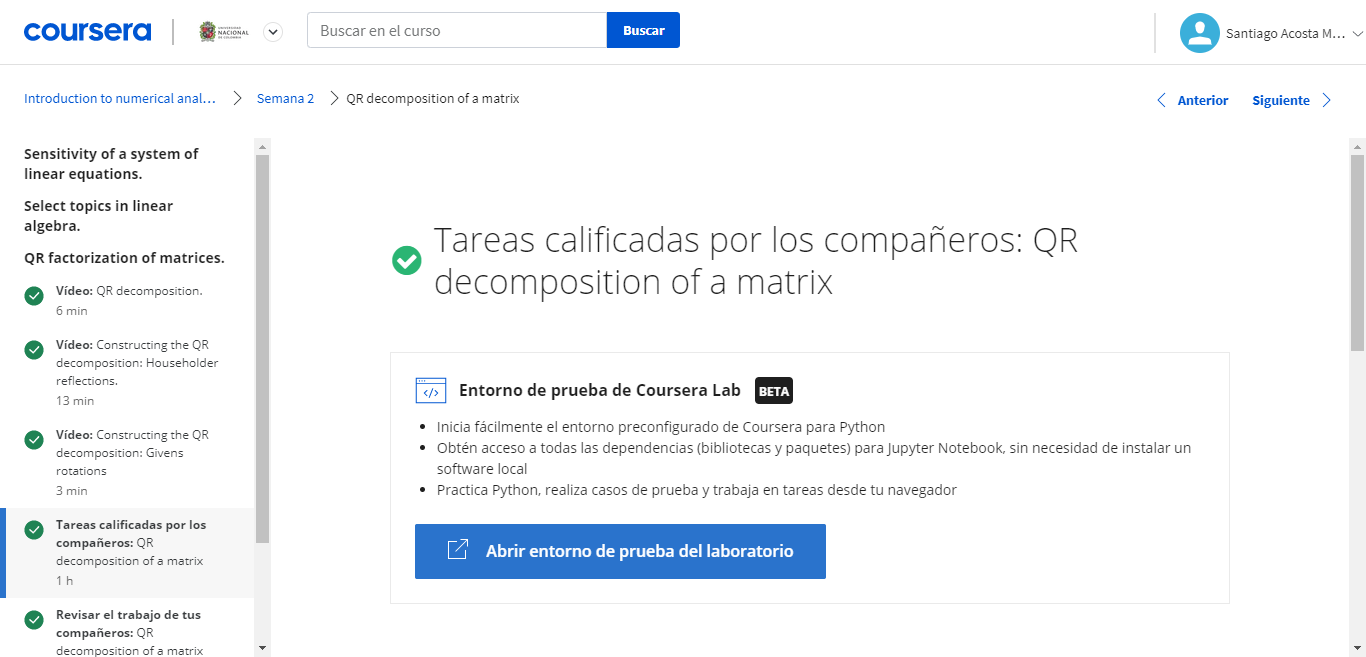

In [1]:
import numpy as np

from numpy.testing import assert_allclose

# Part I. Construct a Householder reflection of a vector.

Given a vector $\mathbf{x}$, and a plane with a normal vector $\mathbf{u}$, the Householder transformation reflects $\mathbf{x}$ about the plane.

The matrix of the Householder transformation is

$$
\mathbf{H} = \mathbf{I} - 2 \mathbf{u} \mathbf{u}^T
$$

Given two equal-length vectors $\mathbf{x}$ and $\mathbf{y}$, a rotation which brings $\mathbf{x}$ to $\mathbf{y}$ is a Householder transform with

$$
\mathbf{u} = \frac{\mathbf{x} - \mathbf{y}}{\left|\mathbf{x} - \mathbf{y}\right|}
$$

Write a function which rotates a given vector, $\mathbf{x} = (x_1, \dots, x_n)$ into $\mathbf{y} = (\left|\mathbf{x}\right|, 0, \dots, 0)^T$ using a Householder transformation.

In [2]:
def householder(vec):
    """Construct a Householder reflection to zero out 2nd and further components of a vector.

    Parameters
    ----------
    vec : array-like of floats, shape (n,)
        Input vector
    
    Returns
    -------
    outvec : array of floats, shape (n,)
        Transformed vector, with ``outvec[1:]==0`` and ``|outvec| == |vec|``
    H : array of floats, shape (n, n)
        Orthogonal matrix of the Householder reflection
    """
    vec = np.asarray(vec, dtype=float)
    if vec.ndim != 1:
        print("Array dimension must be different from 0" % vec.ndim)
        return 

    u= vec.copy()
    u[0] = (-vec[1:]**2).sum()/(vec[0] + np.linalg.norm(vec, ord = 2))
    u /=np.linalg.norm(u, ord = 2)
    
    H = np.eye(vec.shape[0])
    H-=2*u.reshape(-1,1)@u.reshape(1,-1)
    
    return np.dot(H, vec), H
    

Test your function using tests below:

In [3]:
# Test I.1 (10% of the total grade).

v = np.array([1, 2, 3])
v1, h = householder(v)

assert_allclose(np.dot(h, v1), v)
assert_allclose(np.dot(h, v), v1)

In [4]:
# Test I.2 (10% of the total grade).

rndm = np.random.RandomState(1234)

vec = rndm.uniform(size=7)
v1, h = householder(vec)

assert_allclose(np.dot(h, v1), vec)

# Part II. Compute the $\mathrm{QR}$ decomposition of a matrix.

Given a rectangular $m\times n$ matrix $\mathbf{A}$, construct a Householder reflector matrix $\mathbf{H}_1$ which transforms the first column of $\mathbf{A}$ (and call the result $\mathbf{A}^{(1)}$)

$$
\mathbf{H}_1 \mathbf{A} =%
\begin{pmatrix}
\times & \times & \times & \dots & \times \\
0      & \times & \times & \dots & \times \\
0      & \times & \times & \dots & \times \\
&& \dots&& \\
0      & \times & \times & \dots & \times \\
\end{pmatrix}%
\equiv \mathbf{A}^{(1)}\;.
$$

Now consider the lower-right submatrix of $\mathbf{A}^{(1)}$, and construct a Householder reflector which annihilates the second column of $\mathbf{A}$:

$$
\mathbf{H}_2 \mathbf{A}^{(1)} =%
\begin{pmatrix}
\times & \times & \times & \dots & \times \\
0      & \times & \times & \dots & \times \\
0      & 0      & \times & \dots & \times \\
&& \dots&& \\
0      & 0      & \times & \dots & \times \\
\end{pmatrix}%
\equiv \mathbf{A}^{(2)} \;.
$$

Repeating the process $n-1$ times, we obtain

$$
\mathbf{H}_{n-1} \cdots \mathbf{H}_2 \mathbf{H}_1 \mathbf{A} = \mathbf{R} \;,
$$

with $\mathbf{R}$ an upper triangular matrix. Since each $\mathbf{H}_k$ is orthogonal, so is their product. The inverse of an orthogonal matrix is orthogonal. Hence the process generates the $\mathrm{QR}$ decomposition of $\mathbf{A}$. 

$$
\mathbf{A} = (\mathbf{H}_{n-1} \cdots \mathbf{H}_2 \mathbf{H}_1)^{-1} \mathbf{R} \;,
$$
so 
$$
\mathbf{A} =  \mathbf{Q} \mathbf{R} \;,
$$
with
$$
\mathbf{Q} = (\mathbf{H}_{n-1} \cdots \mathbf{H}_2 \mathbf{H}_1)^{-1} =  \mathbf{H}_1^{-1}  \mathbf{H}_2^{-1}  \cdots \mathbf{H}_{n-1}^{-1} = \mathbf{H}_1^T  \mathbf{H}_2^T  \cdots \mathbf{H}_{n-1}^T 
$$
Since $\mathbf{H}_i$ is ortogonal
$$
\mathbf{H}_i\mathbf{H}_i^T = \mathbf{I}
$$
then
$$
\mathbf{H}^{-1} = \mathbf{H}^T 
$$
but also  $\mathbf{H}_i$ is symetric
$$
\mathbf{H}_i^T = \mathbf{H}_i
$$
so
$$
\mathbf{Q} = \mathbf{H}_1^{-1}  \mathbf{H}_2^{-1}  \cdots \mathbf{H}_{n-1}^{-1} = \mathbf{H}_1^T  \mathbf{H}_2^T  \cdots \mathbf{H}_{n-1}^T =  \mathbf{H}_1 \mathbf{H}_2  \cdots \mathbf{H}_{n-1}
$$


In [5]:
def qr_decomp(a):
    """Compute the QR decomposition of a matrix.
    
    Parameters
    ----------
    a : ndarray, shape(m, n)
        The input matrix
    
    Returns
    -------
    Q : ndarray, shape(m, m)
        The orthogonal matrix
    R : ndarray, shape(m, n)
        The upper triangular matrix
        
    Examples
    --------
    >>> a = np.random.random(size=(3, 5))
    >>> q, r = qr_decomp(a)
    >>> np.assert_allclose(np.dot(q, r), a)
    
    """
    m, n = a.shape

    R = np.array(a, copy=True, dtype=float)
    Q = np.eye(m)

    for i in range(n):
        _, H = householder(R[i:,i])
        h = np.eye(m)
        h[i:,i:] = H
        
        R = h @ R
        Q = Q @ h
        
    return Q, R

In [6]:
# Might want to turn this on for prettier printing: zeros instead of `1e-16` etc

np.set_printoptions(suppress=True)

In [7]:
# Test II.1 (20% of the total grade)

rndm = np.random.RandomState(1234)
a = rndm.uniform(size=(5, 3))
q, r = qr_decomp(a)

# test that Q is indeed orthogonal
assert_allclose(np.dot(q, q.T), np.eye(5), atol=1e-10)

# test the decomposition itself
assert_allclose(np.dot(q, r), a)

Now compare your decompositions to the library function (which actually wraps the corresponding LAPACK functions)

In [8]:
from scipy.linalg import qr
qq, rr = qr(a)

assert_allclose(np.dot(qq, rr), a)

Check if your q and r agree with qq and rr. Explain.

In [9]:
from scipy.linalg import qr
a = np.array([[4,3,1], [5,7,0], [9,9,3], [8,2,4], [9,3,1]])
q, r = qr_decomp(a)
qq, rr = qr(a)
print("q\n", q, end="\n\n")
print("qq\n", qq, end="\n\n")

q
 [[ 0.24479602  0.06723049 -0.00981821  0.96611775  0.04555281]
 [ 0.30599503  0.58266423 -0.33762629 -0.09006618 -0.6669078 ]
 [ 0.55079106  0.4964713   0.36457628 -0.19531237  0.52828277]
 [ 0.48959205 -0.47923271  0.55563068 -0.06304632 -0.46683546]
 [ 0.55079106 -0.42406923 -0.66653641 -0.12799536  0.23694072]]

qq
 [[-0.24479602 -0.06723049  0.00981821 -0.41631113 -0.87300837]
 [-0.30599503 -0.58266423  0.33762629  0.64971343 -0.17535786]
 [-0.55079106 -0.4964713  -0.36457628 -0.41134781  0.38473703]
 [-0.48959205  0.47923271 -0.55563068  0.4547994  -0.1227505 ]
 [-0.55079106  0.42406923  0.66653641 -0.16884307  0.20979928]]



In [10]:
print("r\n", r, end="\n\n")
print("rr\n", rr, end="\n\n")

r
 [[16.34013464 10.46503005  4.40632844]
 [-0.          6.51790964 -0.7843557 ]
 [ 0.          0.          2.63989693]
 [ 0.          0.         -0.        ]
 [-0.          0.          0.        ]]

rr
 [[-16.34013464 -10.46503005  -4.40632844]
 [  0.          -6.51790964   0.7843557 ]
 [  0.           0.          -2.63989693]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]]



In [11]:
print("a\n", a, end="\n\n")
print("q@r\n", q@r, end="\n\n")
print("qq@rr\n", qq@rr, end="\n\n")

a
 [[4 3 1]
 [5 7 0]
 [9 9 3]
 [8 2 4]
 [9 3 1]]

q@r
 [[4. 3. 1.]
 [5. 7. 0.]
 [9. 9. 3.]
 [8. 2. 4.]
 [9. 3. 1.]]

qq@rr
 [[4. 3. 1.]
 [5. 7. 0.]
 [9. 9. 3.]
 [8. 2. 4.]
 [9. 3. 1.]]



Enter your explanation here (10% of the total grade, peer-graded)

# Part III. Avoid forming Householder matrices explicitly.

Note the special structure of the Householder matrices: A reflector $\mathbf{H}$ is completely specified by a reflection vector $\mathbf{u}$. Also note that the computational cost of applying a reflector to a matrix strongly depends on the order of operations:

$$
\left( \mathbf{u} \mathbf{u}^T \right) \mathbf{A}  \qquad \textrm{is } O(m^2 n)\;,
$$
while
$$
\mathbf{u} \left( \mathbf{u}^T \mathbf{A} \right) \qquad \textrm{is } O(mn)
$$

Thus, it seems to make sense to *avoid* forming the $\mathbf{H}$ matrices. Instead, one stores the reflection vectors, $\mathbf{u}$, themselves, and provides a way of multiplying an arbitrary matrix by $\mathbf{Q}^T$, e.g., as a standalone function (or a class).





Write a function which constructs the `QR` decomposition of a matrix *without ever forming the* $\mathbf{H}$ matrices, and returns the $\mathbf{R}$ matrix and reflection vectors. 

Write a second function, which uses reflection vectors to multiply a matrix with $\mathbf{Q}^T$. Make sure to include enough comments for a marker to follow your implementation, and add tests. 

(Peer-graded, 40% of the total grade)

$$
\mathbf{R} = \mathbf{H}_{n-1} \cdots \mathbf{H}_2 \mathbf{H}_1 \mathbf{A} 
$$
and 
$$
\mathbf{H}_i = \mathbf{I} - 2 \mathbf{u}_i \mathbf{u}_i^T
$$
so if
$$
\mathbf{R}_0 =  \mathbf{A}
$$
then 
$$
\mathbf{R}_1 = \mathbf{H}_1 \mathbf{R}_0= \ (\mathbf{I} - 2 \mathbf{u}_1 \mathbf{u}_1^T) \mathbf{R}_0 =  \mathbf{R}_0 -  2 \mathbf{u}_1 ( \mathbf{u}_1^T  \mathbf{R}_0)
$$
and
$$
\mathbf{R}_2 = \mathbf{H}_2 \mathbf{R}_1 = \ (\mathbf{I} - 2 \mathbf{u}_2 \mathbf{u}_2^T) \mathbf{R}_1 =  \mathbf{R}_1 -  2 \mathbf{u}_2 ( \mathbf{u}_2^T  \mathbf{R}_1)
$$
so on until
$$
\mathbf{R} = \mathbf{H}_n \mathbf{R}_{n-1} =  (\mathbf{I} - 2 \mathbf{u}_{n-1} \mathbf{u}_{n-1}^T) \mathbf{R}_{n-1} = \mathbf{R}_{n-1} -  2 \mathbf{u}_{n-1} ( \mathbf{u}_{n-1}^T  \mathbf{R}_{n-1})
$$

In [12]:
def r_decomp(a):
    """Compute R without ever forming the  H  matrices
    
    Parameters
    ----------
    a : ndarray, shape(m, n)
        The input matrix
    
    Returns
    -------
    
    R : ndarray, shape(m, n)
        The upper triangular matrix
    vecs:  reflection vectors.
        
    """
    m, n = a.shape

    R = np.array(a, copy=True, dtype=float)
    Q = np.eye(m)
    
    for i in range(n):
        _, H = householder(R[i:,i])
        h = np.eye(m)
        h[i:,i:] = H
        
        R = h @ R
        Q = Q @ h

    return R, Q

$$
\mathbf{Q} =  \mathbf{H}_1 \mathbf{H}_2  \cdots \mathbf{H}_{n-1}
$$
and
$$
\mathbf{H}_i = \mathbf{I} - 2 \mathbf{u}_i \mathbf{u}_i^T
$$
so 
$$
\mathbf{Q} =  (\mathbf{I} - 2 \mathbf{u}_1 \mathbf{u}_1^T )( \mathbf{I} - 2 \mathbf{u}_2 \mathbf{u}_2^T)  \cdots (\mathbf{I} - 2 \mathbf{u}_{n-1} \mathbf{u}_{n-1}^T)
$$

In [13]:
def q_decomp(vecs):
    """Compute Q and QT from reflection vectors
    
    Parameters
    ----------
    a : ndarray, shape(m, n)
        The input matrix
    
    Returns
    -------
    
    Q : ndarray, shape(m, m)
        The ortogonal matrix
    Q.T : ndarray, shape(m, m)
        The transpose of Q

    """
    m, n = a.shape

    A = np.array(a, copy=True, dtype=float)
    Q = np.eye(m, dtype=float)

    for i in range (0, int(n)):
      v, h1 = householder(A[i: , i])
      B = np.eye(m, dtype=float)
      B[i: , i: ] = h1
      Q = Q @ B
      A = B @ A

    return Q , Q.T  

In [14]:
rndm = np.random.RandomState(1234)
a = rndm.uniform(size=(5, 3))
r, vecs = r_decomp(a)
q,qt = q_decomp(vecs)

# test that Q is indeed orthogonal
assert_allclose(np.dot(q, q.T), np.eye(5), atol=1e-10)

# test the decomposition itself
assert_allclose(np.dot(q, r), a)

In [15]:
from scipy.linalg import qr
qq, rr = qr(a)

assert_allclose(np.dot(qq, rr), a)

In [16]:
a = np.array([[4,3,1], [5,7,0], [9,9,3], [8,2,4], [9,3,1]])
R, vecs = r_decomp(a)
Q,QT = q_decomp(vecs)

print("R\n", R, end="\n\n")
print("Q\n", Q, end="\n\n")
print("QT\n", QT, end="\n\n")
print("QT@Q\n", QT@Q, end="\n\n")
print("a\n", a, end="\n\n")
print("Q@R\n",Q@R, end="\n\n")

R
 [[16.34013464 10.46503005  4.40632844]
 [-0.          6.51790964 -0.7843557 ]
 [ 0.          0.          2.63989693]
 [ 0.          0.         -0.        ]
 [-0.          0.          0.        ]]

Q
 [[ 0.24479602  0.06723049 -0.00981821  0.96611775  0.04555281]
 [ 0.30599503  0.58266423 -0.33762629 -0.09006618 -0.6669078 ]
 [ 0.55079106  0.4964713   0.36457628 -0.19531237  0.52828277]
 [ 0.48959205 -0.47923271  0.55563068 -0.06304632 -0.46683546]
 [ 0.55079106 -0.42406923 -0.66653641 -0.12799536  0.23694072]]

QT
 [[ 0.24479602  0.30599503  0.55079106  0.48959205  0.55079106]
 [ 0.06723049  0.58266423  0.4964713  -0.47923271 -0.42406923]
 [-0.00981821 -0.33762629  0.36457628  0.55563068 -0.66653641]
 [ 0.96611775 -0.09006618 -0.19531237 -0.06304632 -0.12799536]
 [ 0.04555281 -0.6669078   0.52828277 -0.46683546  0.23694072]]

QT@Q
 [[ 1. -0.  0. -0.  0.]
 [-0.  1.  0. -0.  0.]
 [ 0.  0.  1.  0. -0.]
 [-0. -0.  0.  1.  0.]
 [ 0.  0. -0.  0.  1.]]

a
 [[4 3 1]
 [5 7 0]
 [9 9 3]
 [8 2 